In [2]:
from initial_plots import *

In [3]:
df = read_dataset(gt=False)
X = np.array(df)

df = read_dataset(gt=True)
y = np.array(df)

zero_labeled = np.argwhere(y.ravel() == 0)
zero_labeled = [idx for [idx] in zero_labeled]

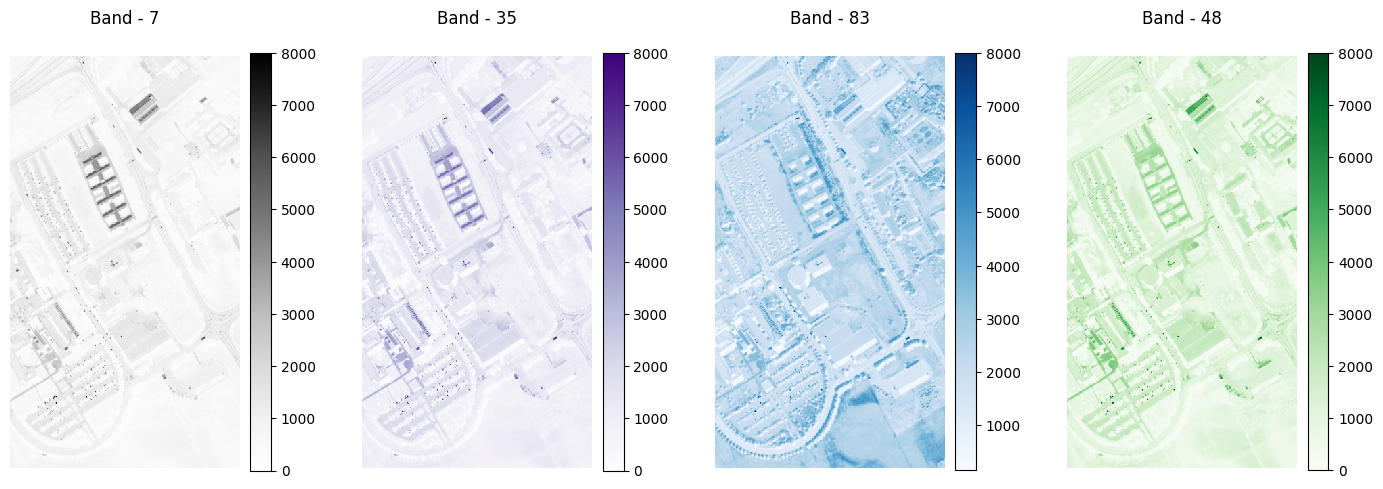

In [4]:
df = read_dataset(gt=False)
X = np.array(df)
plot_spectral_band(df)

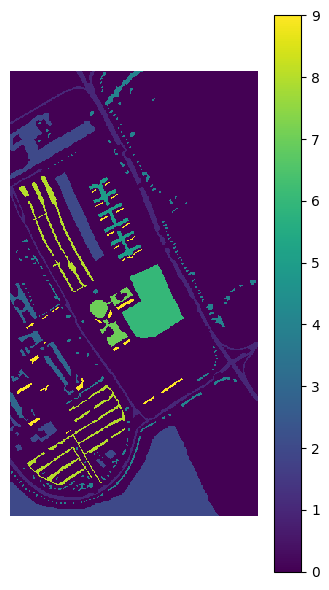

In [5]:
df_gt = read_dataset(gt=True)
plot_gt(df_gt)

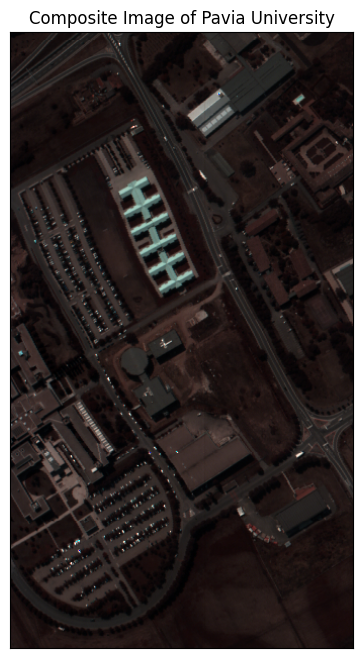

In [6]:
plot_composite(df)

In [7]:
def padWithZeros(X, left_margin=1, right_margin=1, top_margin=1, bottom_margin=1, dim=3):
    if dim == 3:
        newX = np.zeros((X.shape[0] + left_margin + right_margin, X.shape[1] + top_margin + bottom_margin, X.shape[2]))
        newX[left_margin:X.shape[0] + left_margin, top_margin:X.shape[1] + top_margin, :] = X
    
    elif dim == 2:
        newX = np.zeros((X.shape[0] + left_margin + right_margin, X.shape[1] + top_margin + bottom_margin))
        newX[left_margin:X.shape[0] + left_margin, top_margin:X.shape[1] + top_margin] = X

    else:
        newX = []

    return newX

In [8]:
def patch_data(data, labels, rows_factor=3, cols_factor=3):
    rows, cols, channels = data.shape

    left_margin = ((-rows) % rows_factor) // 2
    right_margin = ((-rows) % rows_factor + 1) // 2
    top_margin = ((-cols) % cols_factor) // 2
    bottom_margin = ((-cols) % cols_factor + 1) // 2

    data = padWithZeros(data, left_margin=left_margin, right_margin=right_margin, top_margin=top_margin, bottom_margin=bottom_margin)
    labels = padWithZeros(labels, left_margin=left_margin, right_margin=right_margin, top_margin=top_margin, bottom_margin=bottom_margin, dim=2)

    new_rows, new_cols, _ = data.shape

    patched_data = np.empty((new_rows // rows_factor, new_cols // cols_factor, rows_factor, cols_factor, channels))
    patched_labels = np.zeros((patched_data.shape[0], patched_data.shape[1]))

    for i in range(new_rows // rows_factor):
        for j in range(new_cols // cols_factor):
            datapoint = data[i*rows_factor: (i+1)*rows_factor, j*cols_factor: (j+1)*cols_factor, :]
            patched_data[i, j] = datapoint
            patched_labels[i, j] = labels[i*rows_factor + rows_factor//2, j*cols_factor + cols_factor//2]

    return patched_data, patched_labels


In [9]:
rows_factor=21
cols_factor=21

X_patches, y_patches = patch_data(X.reshape((610,340, 103)), y, rows_factor, cols_factor)

y_patches = y_patches.flatten()

X_patches = X_patches.reshape(-1, np.prod(X_patches.shape[2:]))
X_patches.shape

(510, 45423)

In [10]:
from scipy.spatial.distance import cdist

distances = cdist(X_patches, X_patches, 'euclidean')

distances.shape

(510, 510)

In [21]:
import sys
sys.path.insert(1, '../')
from utils import*

P = calc_P(distances, apply_2_norm=True)

P.shape

(510, 510)

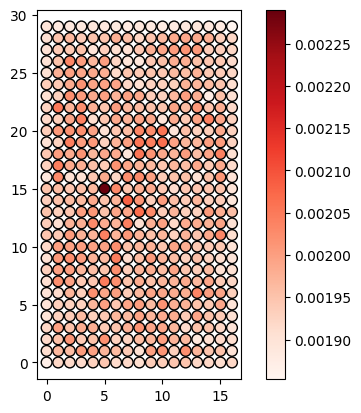

In [16]:
import math

colors,norm,cmap = multi_scale_propagated_densities_colors(distances, i=(260), k=0)

x_points = np.zeros((distances.shape[0]))
y_points = np.zeros((distances.shape[1]))

rows = math.ceil(610 / rows_factor)
cols = math.ceil(340 / cols_factor)
for i in range(rows):
    for j in range(cols):
        x_points[i * cols + j] = j
        y_points[i * cols + j] = i

plt.scatter(x_points, y_points, c=colors, norm=norm, cmap=cmap,edgecolors='black',s=60)

plt.colorbar()

plt.gca().set_aspect('equal')

plt.show()

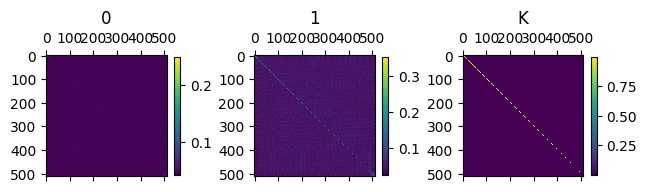

In [19]:
HDE = display_figure_C(distances)

In [22]:
d_HDD = hdd(HDE,P)

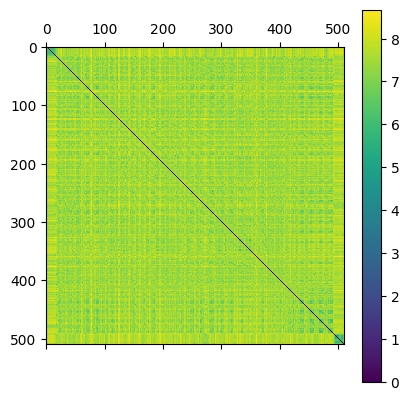

In [24]:
mat_show(d_HDD, plt.cm.viridis)
